In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

import os
import glob
import re

# Summary

- **Group 1: Social media** 
- **Group 2: Google ('include YouTube')**
- **Group 3: wom**
- **Group 4: others (include parnetship)**
- **Group 5: online ads**
- **Group 6: offline**
- **Group 7: dont know**

In [210]:
tables = [survey_SE, survey_FI,
         survey_NO, survey_FR,
         survey_DE, survey_GB,
         survey_NL, survey_ES,
         survey_DK, survey_IT]

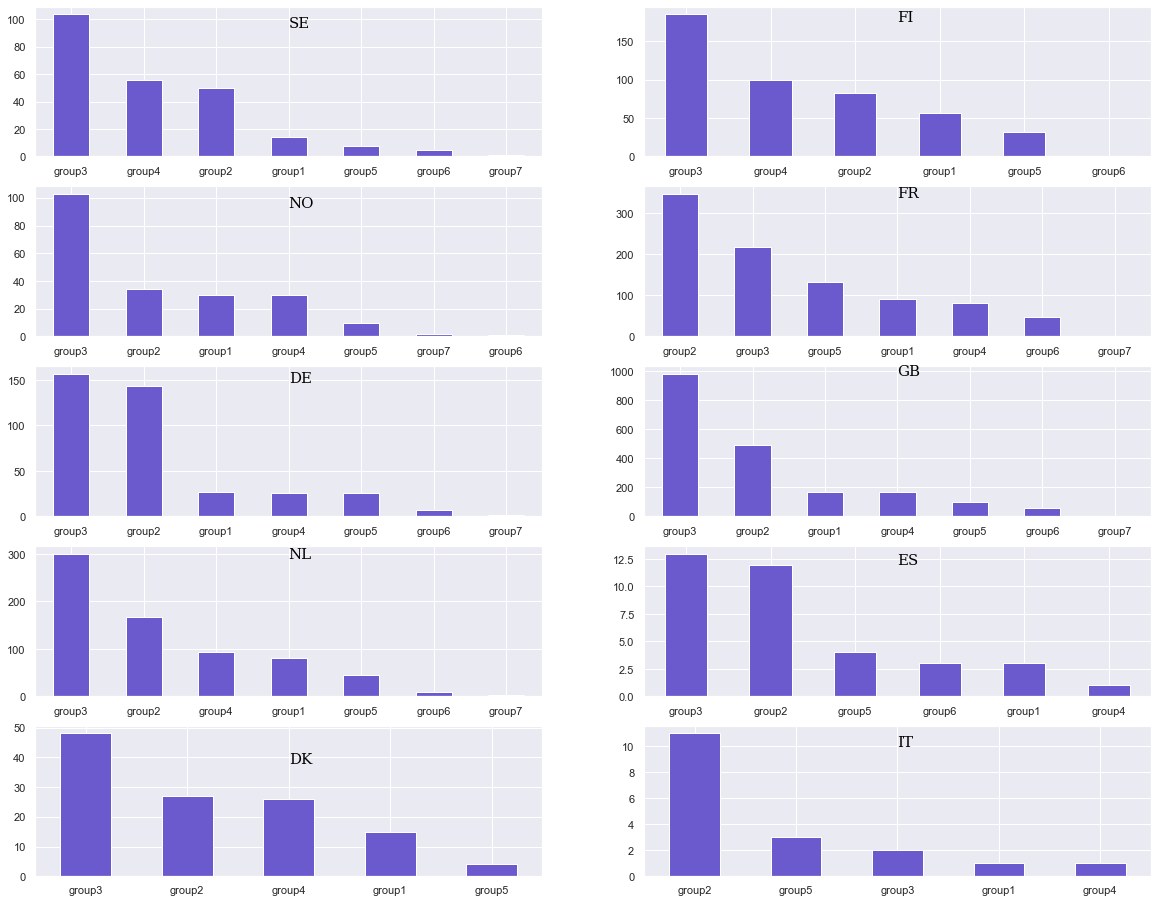

In [211]:
fig = plt.figure(figsize=(20,16))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

for index in range(0, len(tables)):
    text = list(tables[index].country_id.unique())[0]
    data = tables[index]
    
    height = tables[index].group.value_counts().max()
    if height < 20:
        height_f = height - 1
    else: height_f = height - 10
        
    width = tables[index].group.nunique()
    if width == 7: 
        width_f = 3
    elif width == 6:
        width_f = 2.5
    else: width_f = 2
    
    fig.add_subplot(5,2,index+1)
    data.group.value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
    plt.text(width_f, height_f, text, fontdict=font)
    
plt.show()

**Set working dir**

In [2]:
path = '/Users/trang.tran/Documents/MarketingAttributionProject/Surveys/NPS_3months&yearlycheck'
os. chdir(path)

In [3]:
os.getcwd() 

'/Users/trang.tran/Documents/MarketingAttributionProject/Surveys/NPS_3months&yearlycheck'

# 1. Load files

In [4]:
files = glob.glob('*.csv')

In [5]:
files

['2019-09-23 12-01-24 CEST - MX - 3 Months Check Survey.csv',
 '2019-09-23 12-03-42 CEST - SE - 3 Months Check Survey.csv',
 '2019-09-23 11-57-05 CEST - FI - 3 Months Check Survey.csv',
 '2019-09-23 11-57-46 CEST - FISV - 3 Months Check Survey.csv',
 '2019-09-23 12-02-46 CEST - NO - 3 Months Check Survey.csv',
 '2019-09-23 11-55-29 CEST - DK - 3 Months Check Survey.csv',
 '2019-09-23 12-01-01 CEST - IT - 3 Months Check Survey.csv',
 '2019-09-23 12-00-23 CEST - GB - 3 Months Check Survey.csv',
 '2019-09-23 12-02-20 CEST - NL - 3 Months Check Survey.csv',
 '2019-09-23 11-58-29 CEST - FR - 3 Months Check Survey.csv',
 '2019-09-23 11-56-21 CEST - ES - 3 Months Check Survey.csv',
 '2019-09-23 11-52-50 CEST - DE - 3 Months Check Survey.csv']

In [6]:
survey = pd.DataFrame()
for market in files:
    df = pd.read_csv(market, usecols = [7,11], skiprows = 1, header = 0)
    survey = pd.concat([survey, df], ignore_index = True)
    

In [7]:
survey.columns = ['country_id', 'howdoyouknowiZettle']

# 2. Data clean

In [8]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 2 columns):
country_id             6226 non-null object
howdoyouknowiZettle    6225 non-null object
dtypes: object(2)
memory usage: 97.4+ KB


In [9]:
survey.country_id.nunique()

11

In [11]:
survey.howdoyouknowiZettle.nunique()

321

Change data type to category

In [10]:
survey.country_id = survey.country_id.astype('category')

In [12]:
survey.country_id.value_counts()

GB    1963
MX    1173
FR     921
NL     701
FI     459
DE     387
SE     238
NO     210
DK     120
ES      36
IT      18
Name: country_id, dtype: int64

# 3. Exploration

In [13]:
list(survey.country_id.unique())

['MX', 'SE', 'FI', 'NO', 'DK', 'IT', 'GB', 'NL', 'FR', 'ES', 'DE']

In [14]:
survey.head()

,country_id,howdoyouknowiZettle
0,MX,Ads en la web
1,MX,Búsqueda en la web (Google)
2,MX,Búsqueda en la web (Google)
3,MX,Yo pagué algo con iZettle o vi a alguien hacerlo
4,MX,Alguien me lo recomendó


# 4. Europe

In [88]:
survey_eu = pd.concat([survey_SE, survey_FI, survey_NO, survey_DK, survey_IT, 
                       survey_GB, survey_NL, survey_FR, survey_DE, survey_ES], axis = 0)

In [97]:
survey_eu_group = pd.DataFrame(survey_eu.groupby('group')['country_id'].count().sort_values(ascending = False))
survey_eu_group['percent'] = survey_eu_group['country_id']/survey_eu_group['country_id'].sum()

In [102]:
survey_eu_group_t = survey_eu_group.transpose()
survey_eu_group_t

group,group3,group2,group4,group1,group5,group6,group7
country_id,2117.000000,1365.000000,580.000000,486.00000,361.000000,131.000000,13.000000
percent,0.418959,0.270137,0.114783,0.09618,0.071443,0.025925,0.002573


In [111]:
survey_eu_group_t.loc[['percent',]]

group,group3,group2,group4,group1,group5,group6,group7
percent,0.418959,0.270137,0.114783,0.09618,0.071443,0.025925,0.002573


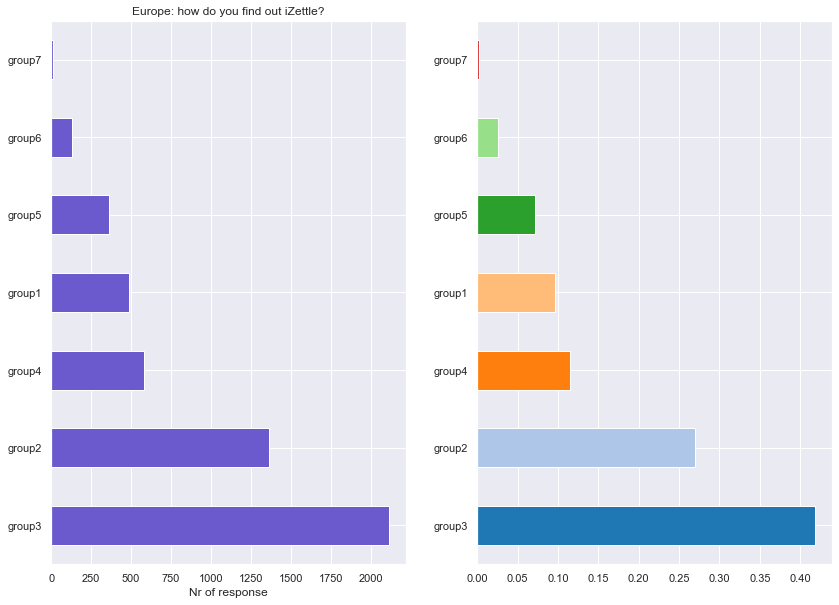

In [162]:
fig = plt.figure(figsize = (14,10))

fig.add_subplot(1,2,1)
survey_eu_group['country_id'].plot(kind = 'barh', color = 'slateblue')
plt.title('Europe: how do you find out iZettle?')
plt.xlabel('Nr of response')
plt.ylabel('')

fig.add_subplot(1,2,2)
survey_eu_group_t.loc['percent',].plot(kind = 'barh', color = sbn.color_palette('tab20'))
plt.ylabel('')
plt.xlabel('')
plt.show()

# 5. Sweden

In [14]:
survey_SE = survey[survey.country_id == 'SE']
survey_SE

,country_id,howdoyouknowiZettle
1173,SE,Sociala medier
1174,SE,Via internet (Google)
1175,SE,Sociala medier
1176,SE,Genom rekommendationer från någon
1177,SE,Genom rekommendationer från någon
...,...,...
1406,SE,"Jag betalade någonting med iZettle, eller såg ..."
1407,SE,Genom rekommendationer från någon
1408,SE,Genom rekommendationer från någon
1409,SE,Via internet (Google)


In [15]:
survey_SE.howdoyouknowiZettle.nunique()

16

In [16]:
print(survey[survey.country_id == 'SE'].howdoyouknowiZettle.unique())

['Sociala medier' 'Via internet (Google)'
 'Genom rekommendationer från någon'
 'Jag betalade någonting med iZettle, eller såg någon betala med iZettle '
 'Online-annonser' 'TV' 'På mässan' 'Har använt det tidigare'
 'Tidningar/magasin'
 'Jag vat ute själv och letade på googel.Och kollade på flera alternativ'
 'minns ej' 'Testat tidigare i andra sammanhang. ' 'YouTube'
 'blev rekommenderad' 'Har använt det tidigare.' 'Kompis ']


- **Group 1: Social media ('Sociala medier')** 
- **Group 2: Google ('Via internet (Google)' +  'Jag vat ute själv och letade på googel.Och kollade på flera alternativ' +'YouTube')**
- **Group 3: wom ('Genom rekommendationer från någon' + 'blev rekommenderad' +'Kompis ')**
- **Group 4: others ('Jag betalade någonting med iZettle, eller såg någon betala med iZettle ' + 'Har använt det tidigare' + 'Har använt det tidigare.' + 'Testat tidigare i andra sammanhang. ')**
- **Group 5: online ads ('Online-annonser')**
- **Group 6: offline ('TV' + 'På mässan' + 'Tidningar/magasin')**
- **Group 7: dont know ('minns ej')**

In [17]:
group1 = ['Sociala medier']
group2 = ['Via internet (Google)', 'Jag vat ute själv och letade på googel.Och kollade på flera alternativ','YouTube']
group3 = ['Genom rekommendationer från någon', 'blev rekommenderad','Kompis ']
group4 = ['Jag betalade någonting med iZettle, eller såg någon betala med iZettle ', 'Har använt det tidigare' 
          ,'Har använt det tidigare.', 'Testat tidigare i andra sammanhang. ']
group5 = ['Online-annonser']
group6 = ['TV','På mässan','Tidningar/magasin']
group7 = ['minns ej']

In [18]:
def group(x):
    if x in group1:
        return 'group1'
    elif x in group2:
        return 'group2'
    elif x in group3:
        return 'group3'
    elif x in group4:
        return 'group4'
    elif x in group5:
        return 'group5'
    elif x in group6:
        return 'group6'
    elif x in group7: 
        return 'group7'
    else:
        return 'No group'


In [19]:
survey_SE['group'] = survey_SE.howdoyouknowiZettle.apply(group)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
survey_SE.head()

,country_id,howdoyouknowiZettle,group
1173,SE,Sociala medier,group1
1174,SE,Via internet (Google),group2
1175,SE,Sociala medier,group1
1176,SE,Genom rekommendationer från någon,group3
1177,SE,Genom rekommendationer från någon,group3


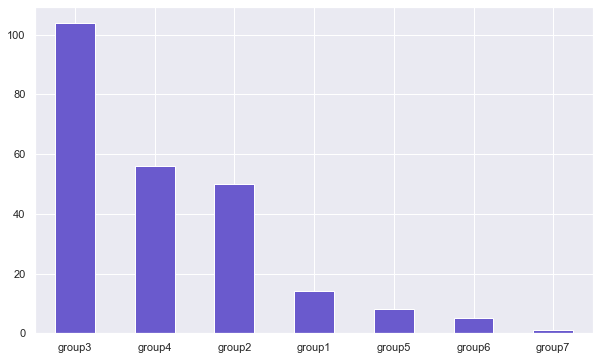

In [21]:
sbn.set(rc = {'figure.figsize':(10,6)})
survey_SE.group.value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
plt.show()

# 6. Finland

In [22]:
survey_FI = survey[survey.country_id == 'FI']

In [23]:
survey_FI.howdoyouknowiZettle.nunique()

19

In [24]:
print(survey_FI.howdoyouknowiZettle.unique())

['Sosiaalisen median' 'Internethaulla (Google)'
 'Joku suositteli iZettleä minulle'
 'Käytin tai näin jonkun käyttävän iZettleä maksamiseen' 'Verkkomainoksen'
 'Minulle suositeltiin laitetta' 'Kaveri kerto.'
 'Etsin tarpeeseen ja vertailussani tämä vaihtoehto oli paras'
 'Vertailin erilaisia vaihtoehtoja eli Google, Facebook-ryhmät, kaverit, yrittäjäkurssilla juteltiin eri vaihtoehdoista'
 'Etsimme edullista maksukortti sovellusta'
 'Op pankki hyvä asiakas palvelu oli.'
 'Asioin liikkeessä jossa oli iZettle ' 'Ex mieheni firma käytti iZettleä'
 ' YouTuben kautta' 'Genom rekommendationer från någon'
 'Via internet (Google)' 'Sociala medier' 'TV'
 'Jag betalade någonting med iZettle, eller såg någon betala med iZettle ']


In [25]:
group1_fi = ['Sosiaalisen median', 'Sociala medier']
group2_fi = ['Internethaulla (Google)', 'Etsin tarpeeseen ja vertailussani tämä vaihtoehto oli paras', 
            'Vertailin erilaisia vaihtoehtoja eli Google, Facebook-ryhmät, kaverit, yrittäjäkurssilla juteltiin eri vaihtoehdoista',
            ' YouTuben kautta', 'Via internet (Google)']
group3_fi = ['Joku suositteli iZettleä minulle', 'Minulle suositeltiin laitetta', 'Kaveri kerto.',
            'Genom rekommendationer från någon']
group4_fi = ['Käytin tai näin jonkun käyttävän iZettleä maksamiseen', 'Etsimme edullista maksukortti sovellusta',
            'Op pankki hyvä asiakas palvelu oli.', 'Asioin liikkeessä jossa oli iZettle ',
            'Ex mieheni firma käytti iZettleä',
            'Jag betalade någonting med iZettle, eller såg någon betala med iZettle ']
group5_fi = ['Verkkomainoksen']
group6_fi = ['TV']
#group7_fi = []

In [26]:
def group_fi(x):
    if x in group1_fi:
        return 'group1'
    elif x in group2_fi:
        return 'group2'
    elif x in group3_fi:
        return 'group3'
    elif x in group4_fi:
        return 'group4'
    elif x in group5_fi:
        return 'group5'
    elif x in group6_fi:
        return 'group6'
    else:
        return 'No group'

In [27]:
survey_FI['group'] = survey_FI.howdoyouknowiZettle.apply(group_fi)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


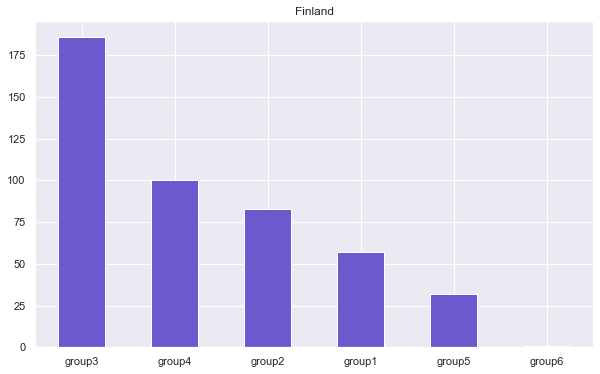

In [28]:
survey_FI.group.value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
plt.title('Finland')
plt.show()

# 7. Norway

In [29]:
survey_NO = survey[survey.country_id == 'NO']

In [30]:
survey_NO.howdoyouknowiZettle.nunique()

15

In [31]:
print(survey_NO.howdoyouknowiZettle.unique())

['Noen anbefalte meg iZettle' 'Sosiale medier'
 'Jeg betalte for noe med iZettle eller så noen andre gjøre det'
 'Internett-søk (Google)' 'Fra bruten mine' 'Nettannonser'
 'Jeg kjente til dette systemet fra tidligere '
 'Jeg jobber med betalinger, og kjente derfor til iZettle' 'Tvunget'
 'husker ikke' 'gjennom jobb' 'facebook'
 'En kollega hadde sett dette på et annet sted' 'Avis eller blad'
 'På annen jobb']


In [32]:
group1_no = ['Sosiale medier', 'facebook']
group2_no = ['Internett-søk (Google)' ]
group3_no = ['Noen anbefalte meg iZettle', 'Fra bruten mine',
            'En kollega hadde sett dette på et annet sted']
group4_no = ['Jeg betalte for noe med iZettle eller så noen andre gjøre det',
            'Jeg jobber med betalinger, og kjente derfor til iZettle',
            'Tvunget', 'gjennom jobb', 'På annen jobb']
group5_no = ['Nettannonser']
group6_no = ['Avis eller blad']
group7_no = ['Jeg kjente til dette systemet fra tidligere ',
            'husker ikke']

In [33]:
def group_no(x):
    if x in group1_no:
        return 'group1'
    elif x in group2_no:
        return 'group2'
    elif x in group3_no:
        return 'group3'
    elif x in group4_no:
        return 'group4'
    elif x in group5_no:
        return 'group5'
    elif x in group6_no:
        return 'group6'
    elif x in group7_no:
        return 'group7'
    else:
        return 'No group'

In [34]:
survey_NO['group'] = survey_NO.howdoyouknowiZettle.apply(group_no)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


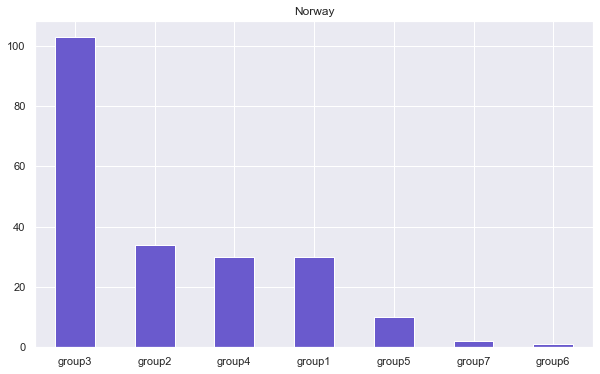

In [35]:
survey_NO['group'].value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
plt.title('Norway')
plt.show()

# 8. Denmark

In [36]:
survey_DK = survey[survey.country_id == 'DK']

In [37]:
survey_DK.howdoyouknowiZettle.nunique()

10

In [38]:
print(survey_DK.howdoyouknowiZettle.unique())

['Jeg fik anbefalet iZettle'
 'Jeg betalte for noget med iZettle, eller så en anden gøre det'
 'Sociale medier' 'Internetsøgning (Google)'
 'Set den anvendt i forskellige små forretninger' 'Onlinereklamer' 'Ven'
 'Min bank' 'ven' 'fra min kasseterminal udbyder']


In [39]:
group1_dk = ['Sociale medier']
group2_dk = ['Internetsøgning (Google)']
group3_dk = ['Jeg fik anbefalet iZettle', 'Ven', 'ven']
group4_dk = ['Jeg betalte for noget med iZettle, eller så en anden gøre det', 
             'Set den anvendt i forskellige små forretninger',
            'Min bank',
            'fra min kasseterminal udbyder']
group5_dk = ['Onlinereklamer']
#group6_dk = []
#group7_dk = []

In [40]:
def group_dk(x):
    if x in group1_dk:
        return 'group1'
    elif x in group2_dk:
        return 'group2'
    elif x in group3_dk:
        return 'group3'
    elif x in group4_dk:
        return 'group4'
    elif x in group5_dk:
        return 'group5'
    else:
        return 'No group'

In [41]:
survey_DK['group'] = survey_DK.howdoyouknowiZettle.apply(group_dk)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


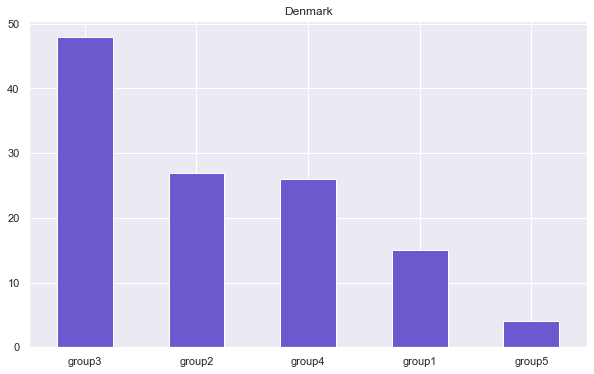

In [42]:
survey_DK['group'].value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
plt.title('Denmark')
plt.show()

# 9. Italy

In [43]:
survey_IT = survey[survey.country_id == 'IT']

In [44]:
survey_IT.howdoyouknowiZettle.nunique()

5

In [45]:
print(survey_IT.howdoyouknowiZettle.unique())

['Pubblicità online' 'Ricerca su internet (Google)'
 'Ho pagato qualcosa con iZettle o ho visto qualcun altro usarlo'
 'Qualcuno mi ha raccomandato iZettle' 'Social media']


In [46]:
group1_it = ['Social media']
group2_it = ['Ricerca su internet (Google)' ]
group3_it = ['Qualcuno mi ha raccomandato iZettle']
group4_it = ['Ho pagato qualcosa con iZettle o ho visto qualcun altro usarlo']
group5_it = ['Pubblicità online']

In [47]:
def group_it(x):
    if x in group1_it:
        return 'group1'
    elif x in group2_it:
        return 'group2'
    elif x in group3_it:
        return 'group3'
    elif x in group4_it:
        return 'group4'
    elif x in group5_it:
        return 'group5'
    else:
        return 'No group'

In [48]:
survey_IT['group'] = survey_IT.howdoyouknowiZettle.apply(group_it)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


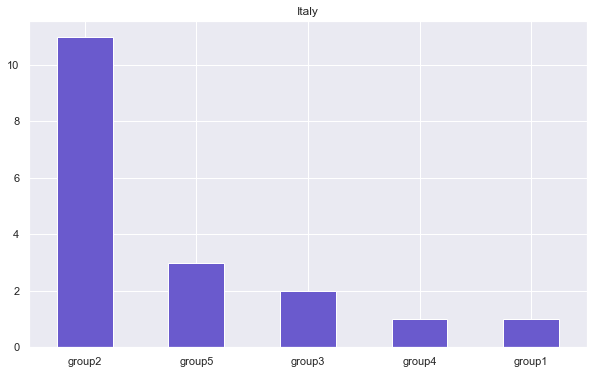

In [49]:
survey_IT.group.value_counts().plot(kind = 'bar', rot = 0, color = 'slateblue')
plt.title('Italy')
plt.show()

# 10. Great Britain

In [50]:
survey_GB = survey[survey.country_id == 'GB']

In [51]:
survey_GB.howdoyouknowiZettle.nunique()

62

In [52]:
print(survey_GB.howdoyouknowiZettle.unique())

['Previous experience ' 'Somebody recommended iZettle to me'
 'Internet search (Google)' 'Online ads'
 'I paid for something with iZettle or saw someone else do so'
 'Social media' 'It was in place in the business already' 'YouTube'
 'Television' 'Account ' "can't remember" 'Outdoor advertising'
 'Social Media, people using it, google search'
 'Use it in another business' 'Parish buying scheme'
 'Previous company owner' 'looked for payment by card'
 'Recommended by a user' 'Radio' 'Recommended by santander bank '
 'Facebook' 'Referal' 'Been aware of it for a while '
 'Santander promote use' 'Online review website' 'Newspaper or magazine'
 'I was directly contacted' 'I googled small business card readers' 'Bank'
 'Santander recommended'
 'Own research and trial of several mobile payment systems including iZettle'
 'In payment industry ' 'Through friend’s' "I don't remember" 'A friend'
 'Through my business bank Santander' 'Used it in my previous employment '
 'Google search' 'payments p

In [53]:
group1_gb = ['Social media', 'Social Media, people using it, google search',
            'Facebook']

group2_gb = ['Internet search (Google)', 'YouTube', 'looked for payment by card', 
            'I googled small business card readers',
            'Own research and trial of several mobile payment systems including iZettle',
            'Google search', 'Internet ', 'Search internet',
            'Researched a large number of payment solutions', 'Comparison website']

group3_gb = ['Somebody recommended iZettle to me', 'Previous company owner',
            'Recommended by a user', 'Referal', 'Online review website', 'review site',
            'Through friend’s', 'A friend', 'Apple Store',
            'A friend use to have one',
            'Recommended by another company world pay ',
            'Was recommended by Lightspeed sales team', 'someone told me about it', 'Tabhub recommendation ',
            'Customer told me about it',
            'Word of mouth', 'A friend ']

group4_gb = ['Previous experience ', 'I paid for something with iZettle or saw someone else do so',
             'It was in place in the business already', 'Account ',
             'Use it in another business', 'Parish buying scheme',
             'Recommended by santander bank ', 'Santander promote use', 'Santander recommended',
             'Bank', 'In payment industry ', 'Through my business bank Santander', 
             'Used it in my previous employment ',
             'payments paid to me for services provided',
             'Business bank manager Santander ', 'Via Santander',
             'Seen a few people using it ', 'Business colleagues ',
             'We had it for another part of our business', 'Santander ', 
             'Already a customer '
            ]

group5_gb = ['Online ads']

group6_gb = ['Television', 'Outdoor advertising', 'Radio',
            'Newspaper or magazine', 'I was directly contacted',
            'Salesman called into my shop']

group7_gb = ["can't remember", 'Been aware of it for a while ',
            "I don't remember", 'not sure']

In [54]:
def group_gb(x):
    if x in group1_gb:
        return 'group1'
    elif x in group2_gb:
        return 'group2'
    elif x in group3_gb:
        return 'group3'
    elif x in group4_gb:
        return 'group4'
    elif x in group5_gb:
        return 'group5'
    elif x in group6_gb:
        return 'group6'
    elif x in group7_gb:
        return 'group7'
    else:
        return 'No group'

In [55]:
survey_GB['group'] = survey_GB.howdoyouknowiZettle.apply(group_gb)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


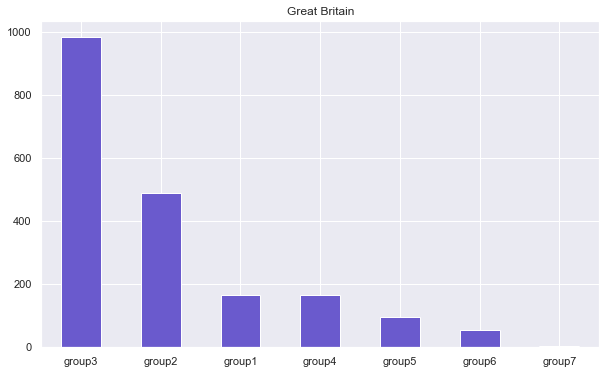

In [56]:
survey_GB.group.value_counts().plot(kind = 'bar', rot = 0, color = 'slateblue')
plt.title('Great Britain')
plt.show()

# 11. Netherland

In [57]:
survey_NL = survey[survey.country_id == 'NL']

In [58]:
survey_NL.howdoyouknowiZettle.nunique()

50

In [59]:
print(survey_NL.howdoyouknowiZettle.unique())

['Zoekmachine/zoekopdracht (Google)' 'Social media'
 ' iZettle werd mij door iemand aanbevolen' 'Online advertenties' 'Google'
 ' Ik betaalde voor iets of zag iemand anders iets betalen met iZettle'
 ' Televisie' 'YouTube' 'Via mijn bank' 'Via knab' 'Via mijn dochter'
 'door mijn man voor mijn bedrijf gekocht' 'uber' 'Weet ik niet'
 'Via Knab' 'Mijnwebwinkel' 'zelf gezocht' 'Knab bank' 'Door collaga'
 'via  vriendin' 'Vriend'
 'Mijn bank ING had jullie aan bevolen. Omdat hun service niet bij mijn bedrijf paste'
 'Ik zocht een handzaam pinapparaat, het was Simyo of iZettle, izettle geworden vanwege het formaat en de snelheid '
 'Collega' 'Krant of tijdschrift' 'bij collega voetbalver. sc Lutten'
 'Familie' 'niet van toepassing'
 'Gebruiktenhet in een winkel waar ik even werkte' 'Kende het product....'
 'collega is gebruiker'
 'Ik had al izettle go voordat ik de pro voor de horeca ging gebruiken!'
 'Adletiekvereninging heeft het' 'Via kennis' 'door Sumup, eigenlijk'
 'Vriendin' 'Familiel

In [60]:
group1_nl = ['Social media', 'Facebook']

group2_nl = ['Zoekmachine/zoekopdracht (Google)', 'Google',
            'YouTube']

group3_nl = [' iZettle werd mij door iemand aanbevolen',
            'Via mijn dochter', 'Door collaga', 'via  vriendin', 'Vriend',
            'Collega', 'bij collega voetbalver. sc Lutten',
            'Familie', 'collega is gebruiker',
            'Vriendin', 'Familielid', 'Collegas',
            'Een andere ondernemer']

group4_nl = [' Ik betaalde voor iets of zag iemand anders iets betalen met iZettle',
             'Via mijn bank', 'Via knab', 'Knab bank',
             'door mijn man voor mijn bedrijf gekocht', 'uber', 'Via Knab', 'Mijnwebwinkel',
             'zelf gezocht', 
             'Mijn bank ING had jullie aan bevolen. Omdat hun service niet bij mijn bedrijf paste',
             'Ik zocht een handzaam pinapparaat, het was Simyo of iZettle, izettle geworden vanwege het formaat en de snelheid ',
             'Gebruiktenhet in een winkel waar ik even werkte',
             'Kende het product....',
             'Ik had al izettle go voordat ik de pro voor de horeca ging gebruiken!',
             'Adletiekvereninging heeft het',
             'Via kennis', 'door Sumup, eigenlijk',
             'Amac store Amstelveen', 'Via via', 'Knab',
             'overgenomen bij aankoop bedrijf', 'Via mijn taxicentrale rtc',
             'door leverancier betaalfunctionaliteit', 'via RTC', 'Onderzoek'
            ]

group5_nl = ['Online advertenties']

group6_nl = [' Televisie', 'Krant of tijdschrift',
            'Een beetje van al deze opties: radio, televisie, dagelijks gebruik bij winkels, online adv, zoekmachine']

group7_nl = ['Weet ik niet', 'niet van toepassing', 'weet ik niet meer']

In [61]:
len(group1_nl) + len(group2_nl) + len(group3_nl) + len(group4_nl) + len(group5_nl) + len(group6_nl) + len(group7_nl)

50

In [62]:
def group_nl(x):
    if x in group1_nl:
        return 'group1'
    elif x in group2_nl:
        return 'group2'
    elif x in group3_nl:
        return 'group3'
    elif x in group4_nl:
        return 'group4'
    elif x in group5_nl:
        return 'group5'
    elif x in group6_nl:
        return 'group6'
    elif x in group7_nl:
        return 'group7'
    else:
        return 'No group'

In [63]:
survey_NL['group'] = survey_NL.howdoyouknowiZettle.apply(group_nl)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


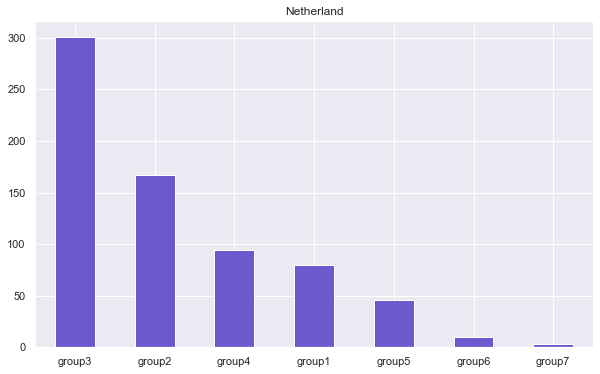

In [64]:
survey_NL.group.value_counts().plot(kind = 'bar', rot = 0, color = 'slateblue')
plt.title('Netherland')
plt.show()

# 12. France

In [65]:
survey_FR = survey[survey.country_id == 'FR']

In [66]:
survey_FR.howdoyouknowiZettle.nunique()

34

In [67]:
print(survey_FR.howdoyouknowiZettle.unique())

['Recherche internet (Google)' "Quelqu'un m'a recommandé iZettle"
 "J'ai utilisé, ou vu quelqu'un utiliser iZettle pour acheter quelque chose"
 'Boursorama ' 'Publicité sur internet' 'Réseaux sociaux' 'Télévision'
 'Par un e-mail de PayPal ' 'un commerçant me la conseiller '
 'Via  Paypal' 'recommandation Boursorama Banque'
 'Salon des Entrepreneurs à Paris' 'Dans un journal ou magazine'
 'Partenariat ' 'Publicité sur la voie publique'
 "L'ancien propriétaire l'utiliser de temps en temps."
 'Proposé par ma banque ' 'obligé par compte pro' 'Radio' 'Boursorama'
 'J avais un autre modèle à la concurrence et je suis partie pour mauvais Acceuil comercial'
 'Vu le Sumup en premier, mais boîtier lisse pas ergonomique' 'marché'
 'je ne me souviens plus' 'YouTube' 'Démarchage commercial de izettle'
 'Banque en ligne' 'Salon SME Paris ' 'Banque Boursorama '
 'Comparatif sur internet' 'Recherche internet qwant '
 'Je ne me souviens pas' 'J’avais des problèmes avec le terminale  sum up'
 ' Ma banq

In [68]:
group1_fr = ['Réseaux sociaux']
group2_fr = ['Recherche internet (Google)', 'YouTube', 'Comparatif sur internet', 'Recherche internet qwant ']
group3_fr = ["Quelqu'un m'a recommandé iZettle", 'un commerçant me la conseiller ']
group4_fr = ["J'ai utilisé, ou vu quelqu'un utiliser iZettle pour acheter quelque chose", 'Par un e-mail de PayPal ',
            'Via  Paypal', 'Partenariat ', 'Boursorama ', 'recommandation Boursorama Banque', "L'ancien propriétaire l'utiliser de temps en temps.",
            'Proposé par ma banque ', 'obligé par compte pro', 'Boursorama', 
            'J avais un autre modèle à la concurrence et je suis partie pour mauvais Acceuil comercial', 
            'Vu le Sumup en premier, mais boîtier lisse pas ergonomique', 'Démarchage commercial de izettle',
            'Banque en ligne', 'Banque Boursorama ', 'J’avais des problèmes avec le terminale  sum up',
            ' Ma banque  Qonto']
group5_fr = ['Publicité sur internet' ]
group6_fr = ['Télévision', 'Salon des Entrepreneurs à Paris', 'Dans un journal ou magazine', 'Publicité sur la voie publique',
            'Radio', 'marché', 'Salon SME Paris ']
group7_fr = ['je ne me souviens plus', 'Je ne me souviens pas']

In [69]:
def group_fr(x):
    if x in group1_fr:
        return 'group1'
    elif x in group2_fr:
        return 'group2'
    elif x in group3_fr:
        return 'group3'
    elif x in group4_fr:
        return 'group4'
    elif x in group5_fr:
        return 'group5'
    elif x in group6_fr:
        return 'group6'
    elif x in group7_fr:
        return 'group7'
    else:
        return 'No group'

In [70]:
survey_FR['group'] = survey_FR.howdoyouknowiZettle.apply(group_fr)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


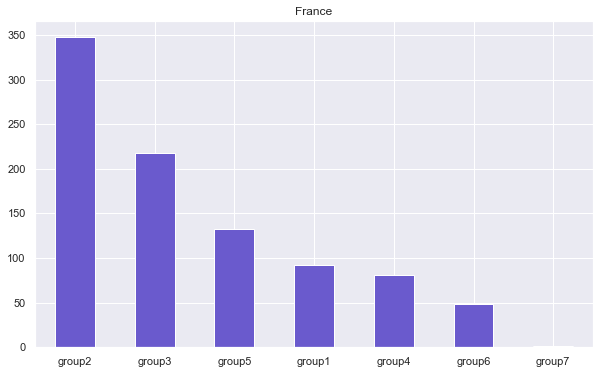

In [71]:
survey_FR.group.value_counts().plot(kind = 'bar', rot = 0, color = 'slateblue')
plt.title('France')
plt.show()

# 13. Germany

In [72]:
survey_DE = survey[survey.country_id == 'DE']

In [73]:
survey_DE.howdoyouknowiZettle.nunique()

23

In [74]:
print(survey_DE.howdoyouknowiZettle.unique())

['Internetsuche (Google)' 'Jemand hat mir iZettle empfohlen'
 ' Ich habe etwas mit iZettle bezahlt oder jemand anderen dabei zugesehen'
 'Soziale Medien' 'Eigeninitiative ' 'Online Werbung' 'PayPal ' 'Freunde'
 nan 'Facebook' 'Zeitung oder Magazin' 'Telefonischer Anruf von PayPal'
 'Paypal Anzeige' 'Reklame' 'Schon vorher mit i zettle gearbeitet'
 'Von der Taxi  Kollegen ' 'Anruf über Paypal ' 'PayPal'
 'Wir befinden uns im selben Coworking Space'
 'Habe von jemand gehört, dass es so etwas gibt. Aber nicht direkt von iZettle.'
 'Fernsehen' 'Beim Apple Händler angeboten worden' 'Von kolleginnen'
 'YouTube']


In [75]:
group1_de = ['Soziale Medien', 'Facebook', ]
group2_de = ['Internetsuche (Google)', 'YouTube']
group3_de = ['Jemand hat mir iZettle empfohlen', 'Freunde', 'Von der Taxi  Kollegen ', 'Von kolleginnen',
             'Wir befinden uns im selben Coworking Space', 'Beim Apple Händler angeboten worden',
             'Habe von jemand gehört, dass es so etwas gibt. Aber nicht direkt von iZettle.']
group4_de = [' Ich habe etwas mit iZettle bezahlt oder jemand anderen dabei zugesehen', 'Eigeninitiative ', 'PayPal ',
            'Paypal Anzeige', 'Reklame', 'Schon vorher mit i zettle gearbeitet', 'PayPal']
group5_de = ['Online Werbung']
group6_de = ['Zeitung oder Magazin', 'Telefonischer Anruf von PayPal',  'Anruf über Paypal ', 'Fernsehen']
group7_de = []

In [76]:
def group_DE(x):
    if x in group1_de:
        return 'group1'
    elif x in group2_de:
        return 'group2'
    elif x in group3_de:
        return 'group3'
    elif x in group4_de:
        return 'group4'
    elif x in group5_de:
        return 'group5'
    elif x in group6_de:
        return 'group6'
    else:
        return 'group7'

In [77]:
survey_DE['group'] = survey_DE.howdoyouknowiZettle.apply(group_DE)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


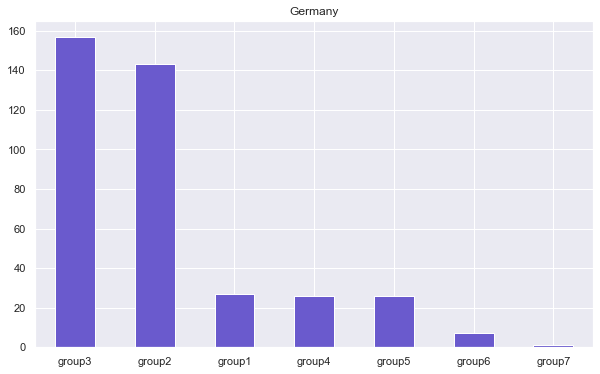

In [78]:
survey_DE.group.value_counts().plot(kind = 'bar', rot = 0, color = 'slateblue')
plt.title('Germany')
plt.show()

# 14. Spain

In [79]:
survey_ES = survey[survey.country_id == 'ES']

In [80]:
survey_ES.howdoyouknowiZettle.nunique()

8

In [81]:
print(survey_ES.howdoyouknowiZettle.unique())

['Búsqueda en la web (Google)' 'Alguien me lo recomendó' 'Ads en la web'
 'Tienda mediamart' 'A través del banco'
 'Yo pagué algo con iZettle o vi a alguien hacerlo' 'Redes sociales'
 'Publicidad exterior']


In [82]:
group1_es = ['Redes sociales']
group2_es = ['Búsqueda en la web (Google)']
group3_es = ['Alguien me lo recomendó', ]
group4_es = ['Yo pagué algo con iZettle o vi a alguien hacerlo', ]
group5_es = ['Ads en la web']
group6_es = ['Tienda mediamart', 'A través del banco', 'Publicidad exterior']
#group7_es = []

In [83]:
def group_es(x):
    if x in group1_es:
        return 'group1'
    elif x in group2_es:
        return 'group2'
    elif x in group3_es:
        return 'group3'
    elif x in group4_es:
        return 'group4'
    elif x in group5_es:
        return 'group5'
    elif x in group6_es:
        return 'group6'
    else:
        return 'No group'

In [84]:
survey_ES['group'] = survey_ES.howdoyouknowiZettle.apply(group_es)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
survey_ES.group = survey_ES.group.astype('category')

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


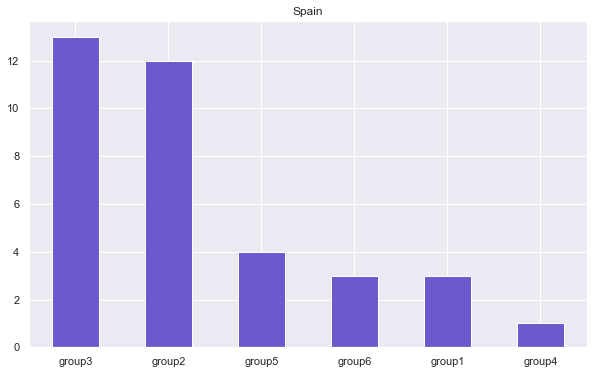

In [86]:
sbn.set(rc = {'figure.figsize':(10,6)})
survey_ES.group.value_counts().plot(kind = 'bar', color = 'slateblue', rot = 0)
plt.title('Spain')
plt.show()